In [31]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.optim as optim
import matplotlib.pyplot as plt
import os

In [32]:
print(torch.cuda.is_available())
print(torch.version.cuda)
print(torch.__version__)

True
12.4
2.4.1+cu124


In [33]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [34]:
batchSize = 32
imageSize = 32
latentDim = 128
numberOfEpochs = 100
learningRateGenerator = 0.0002
learningRateDiscriminator = 0.0002

In [35]:
transform = transforms.Compose([
    transforms.Resize(imageSize),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
dataset = dsets.CIFAR10(root = './data', download = True, transform = transform)
dataloader = DataLoader(dataset, batch_size = 64, shuffle = True)

Files already downloaded and verified


In [36]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latentDim, 256), 
            nn.LeakyReLU(0.2, inplace = True), 
            nn.BatchNorm1d(256), 
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2, inplace = True), 
            nn.BatchNorm1d(512), 
            nn.Linear(512, 1024), 
            nn.LeakyReLU(0.2, inplace = True), 
            nn.BatchNorm1d(1024), 
            nn.Linear(1024, 3 * imageSize * imageSize), 
            nn.Tanh()
        )
    
    def forward(self, input):
        image = self.model(input)
        image = image.view(image.size(0), 3, imageSize, imageSize)
        return image

In [37]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(3 * imageSize * imageSize, 1024), 
            nn.LeakyReLU(0.2, inplace = True), 
            nn.Dropout(0.3), 
            nn.Linear(1024, 512), 
            nn.LeakyReLU(0.2, inplace = True), 
            nn.Dropout(0.3), 
            nn.Linear(512, 256), 
            nn.LeakyReLU(0.2, inplace = True), 
            nn.Linear(256, 1), 
            nn.Sigmoid()
        )
    
    def forward(self, input):
        return self.model(input.view(-1, 3 * 32 * 32))

In [38]:
criterion = nn.BCELoss()
optimizerDiscriminator = optim.Adam(Discriminator().parameters(), lr = learningRateDiscriminator, betas = (0.5, 0.999))
optimizerGenerator = optim.Adam(Generator().parameters(), lr = learningRateGenerator, betas = (0.5, 0.999))

SchedulerGenerator = optim.lr_scheduler.ReduceLROnPlateau(optimizerGenerator, mode = 'min', factor = 0.5, patience = 5)
SchedulerDiscriminator = optim.lr_scheduler.ReduceLROnPlateau(optimizerDiscriminator, mode = 'min', factor = 0.5, patience = 5)

In [39]:
saveDir = os.path.join(os.getcwd(), "GAN_Images")

if not os.path.exists(saveDir):
    os.makedirs(saveDir)

saveDir


'd:\\Finally, A study Folder\\Thapar Summer School on Machine Learning and Deep Learning\\GAN\\VanillaGAN\\GAN_Images'

Epoch [1/100]  Loss D: 1.3892, Loss G: 0.6563
Epoch [1/100]  Loss D: 1.3896, Loss G: 0.6570
Epoch [1/100]  Loss D: 1.3871, Loss G: 0.6575
Epoch [1/100]  Loss D: 1.3844, Loss G: 0.6563
Epoch [1/100]  Loss D: 1.3866, Loss G: 0.6580
Epoch [1/100]  Loss D: 1.3863, Loss G: 0.6573
Epoch [1/100]  Loss D: 1.3862, Loss G: 0.6554
Epoch [1/100]  Loss D: 1.3882, Loss G: 0.6568
Epoch [1/100]  Loss D: 1.3892, Loss G: 0.6592
Epoch [1/100]  Loss D: 1.3877, Loss G: 0.6605
Epoch [1/100]  Loss D: 1.3881, Loss G: 0.6582
Epoch [1/100]  Loss D: 1.3862, Loss G: 0.6573
Epoch [1/100]  Loss D: 1.3861, Loss G: 0.6582
Epoch [1/100]  Loss D: 1.3862, Loss G: 0.6599
Epoch [1/100]  Loss D: 1.3835, Loss G: 0.6600
Epoch [1/100]  Loss D: 1.3899, Loss G: 0.6552
Epoch [1/100]  Loss D: 1.3848, Loss G: 0.6588
Epoch [1/100]  Loss D: 1.3857, Loss G: 0.6580
Epoch [1/100]  Loss D: 1.3867, Loss G: 0.6582
Epoch [1/100]  Loss D: 1.3876, Loss G: 0.6581
Epoch [1/100]  Loss D: 1.3845, Loss G: 0.6575
Epoch [1/100]  Loss D: 1.3886, Los

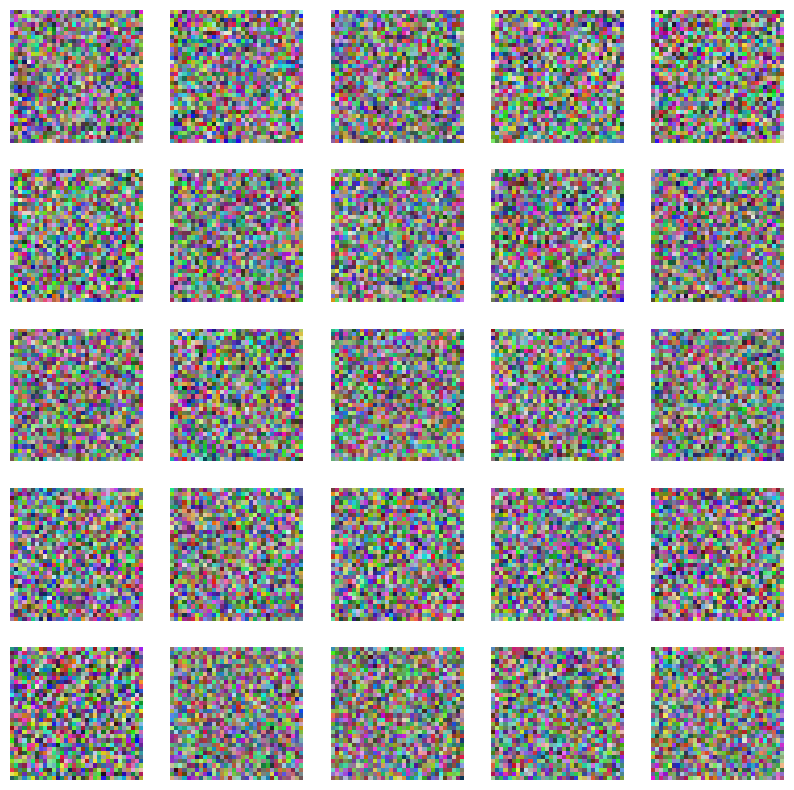

Epoch [2/100]  Loss D: 1.3874, Loss G: 0.6590
Epoch [2/100]  Loss D: 1.3880, Loss G: 0.6578
Epoch [2/100]  Loss D: 1.3871, Loss G: 0.6572
Epoch [2/100]  Loss D: 1.3874, Loss G: 0.6574
Epoch [2/100]  Loss D: 1.3850, Loss G: 0.6574
Epoch [2/100]  Loss D: 1.3860, Loss G: 0.6570
Epoch [2/100]  Loss D: 1.3870, Loss G: 0.6598
Epoch [2/100]  Loss D: 1.3869, Loss G: 0.6581
Epoch [2/100]  Loss D: 1.3868, Loss G: 0.6577
Epoch [2/100]  Loss D: 1.3910, Loss G: 0.6579
Epoch [2/100]  Loss D: 1.3870, Loss G: 0.6584
Epoch [2/100]  Loss D: 1.3893, Loss G: 0.6576
Epoch [2/100]  Loss D: 1.3873, Loss G: 0.6565
Epoch [2/100]  Loss D: 1.3862, Loss G: 0.6569
Epoch [2/100]  Loss D: 1.3904, Loss G: 0.6571
Epoch [2/100]  Loss D: 1.3884, Loss G: 0.6567
Epoch [2/100]  Loss D: 1.3877, Loss G: 0.6571
Epoch [2/100]  Loss D: 1.3855, Loss G: 0.6603
Epoch [2/100]  Loss D: 1.3875, Loss G: 0.6574
Epoch [2/100]  Loss D: 1.3872, Loss G: 0.6579
Epoch [2/100]  Loss D: 1.3905, Loss G: 0.6566
Epoch [2/100]  Loss D: 1.3872, Los

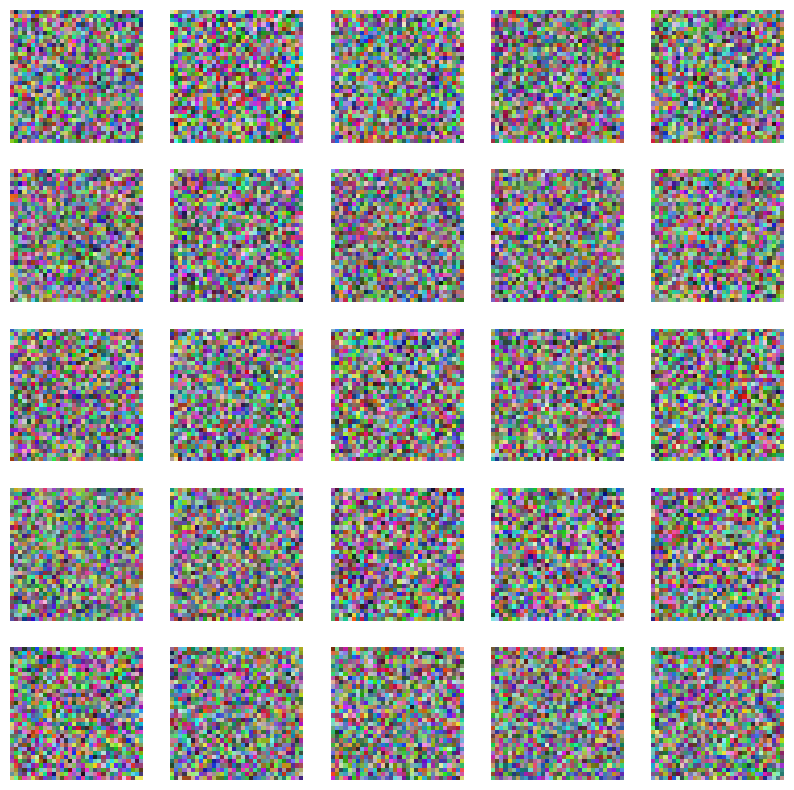

Epoch [12/100]  Loss D: 1.3861, Loss G: 0.6594
Epoch [12/100]  Loss D: 1.3862, Loss G: 0.6586
Epoch [12/100]  Loss D: 1.3903, Loss G: 0.6563
Epoch [12/100]  Loss D: 1.3899, Loss G: 0.6575
Epoch [12/100]  Loss D: 1.3880, Loss G: 0.6598
Epoch [12/100]  Loss D: 1.3858, Loss G: 0.6569
Epoch [12/100]  Loss D: 1.3891, Loss G: 0.6575
Epoch [12/100]  Loss D: 1.3859, Loss G: 0.6571
Epoch [12/100]  Loss D: 1.3879, Loss G: 0.6556
Epoch [12/100]  Loss D: 1.3865, Loss G: 0.6575
Epoch [12/100]  Loss D: 1.3903, Loss G: 0.6578
Epoch [12/100]  Loss D: 1.3875, Loss G: 0.6588
Epoch [12/100]  Loss D: 1.3870, Loss G: 0.6575
Epoch [12/100]  Loss D: 1.3867, Loss G: 0.6591
Epoch [12/100]  Loss D: 1.3853, Loss G: 0.6579
Epoch [12/100]  Loss D: 1.3847, Loss G: 0.6580
Epoch [12/100]  Loss D: 1.3924, Loss G: 0.6579
Epoch [12/100]  Loss D: 1.3885, Loss G: 0.6566
Epoch [12/100]  Loss D: 1.3894, Loss G: 0.6575
Epoch [12/100]  Loss D: 1.3862, Loss G: 0.6587
Epoch [12/100]  Loss D: 1.3862, Loss G: 0.6604
Epoch [12/100

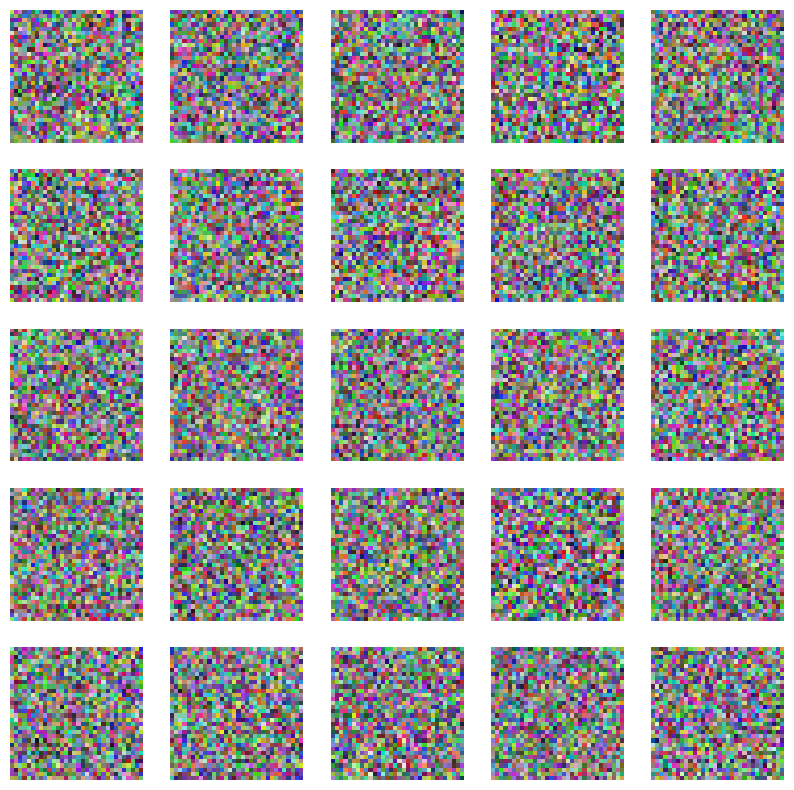

Epoch [22/100]  Loss D: 1.3869, Loss G: 0.6564
Epoch [22/100]  Loss D: 1.3844, Loss G: 0.6594
Epoch [22/100]  Loss D: 1.3888, Loss G: 0.6578
Epoch [22/100]  Loss D: 1.3848, Loss G: 0.6575
Epoch [22/100]  Loss D: 1.3842, Loss G: 0.6583
Epoch [22/100]  Loss D: 1.3858, Loss G: 0.6582
Epoch [22/100]  Loss D: 1.3897, Loss G: 0.6568
Epoch [22/100]  Loss D: 1.3865, Loss G: 0.6585
Epoch [22/100]  Loss D: 1.3844, Loss G: 0.6584
Epoch [22/100]  Loss D: 1.3850, Loss G: 0.6578
Epoch [22/100]  Loss D: 1.3892, Loss G: 0.6569
Epoch [22/100]  Loss D: 1.3852, Loss G: 0.6582
Epoch [22/100]  Loss D: 1.3870, Loss G: 0.6570
Epoch [22/100]  Loss D: 1.3865, Loss G: 0.6568
Epoch [22/100]  Loss D: 1.3870, Loss G: 0.6563
Epoch [22/100]  Loss D: 1.3848, Loss G: 0.6586
Epoch [22/100]  Loss D: 1.3875, Loss G: 0.6579
Epoch [22/100]  Loss D: 1.3906, Loss G: 0.6566
Epoch [22/100]  Loss D: 1.3855, Loss G: 0.6564
Epoch [22/100]  Loss D: 1.3898, Loss G: 0.6593
Epoch [22/100]  Loss D: 1.3862, Loss G: 0.6580
Epoch [22/100

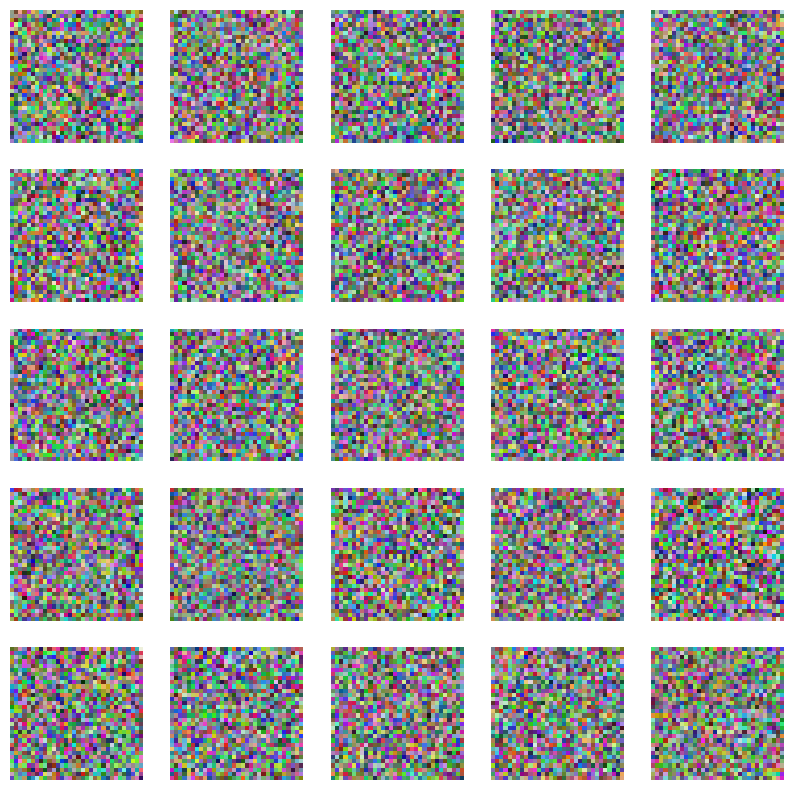

Epoch [32/100]  Loss D: 1.3838, Loss G: 0.6575
Epoch [32/100]  Loss D: 1.3864, Loss G: 0.6590
Epoch [32/100]  Loss D: 1.3887, Loss G: 0.6573
Epoch [32/100]  Loss D: 1.3870, Loss G: 0.6594
Epoch [32/100]  Loss D: 1.3871, Loss G: 0.6577
Epoch [32/100]  Loss D: 1.3863, Loss G: 0.6557
Epoch [32/100]  Loss D: 1.3878, Loss G: 0.6587
Epoch [32/100]  Loss D: 1.3857, Loss G: 0.6579
Epoch [32/100]  Loss D: 1.3869, Loss G: 0.6584
Epoch [32/100]  Loss D: 1.3858, Loss G: 0.6576
Epoch [32/100]  Loss D: 1.3882, Loss G: 0.6588
Epoch [32/100]  Loss D: 1.3901, Loss G: 0.6582
Epoch [32/100]  Loss D: 1.3876, Loss G: 0.6577
Epoch [32/100]  Loss D: 1.3859, Loss G: 0.6588
Epoch [32/100]  Loss D: 1.3875, Loss G: 0.6582
Epoch [32/100]  Loss D: 1.3853, Loss G: 0.6574
Epoch [32/100]  Loss D: 1.3858, Loss G: 0.6577
Epoch [32/100]  Loss D: 1.3881, Loss G: 0.6574
Epoch [32/100]  Loss D: 1.3869, Loss G: 0.6564
Epoch [32/100]  Loss D: 1.3854, Loss G: 0.6568
Epoch [32/100]  Loss D: 1.3873, Loss G: 0.6584
Epoch [32/100

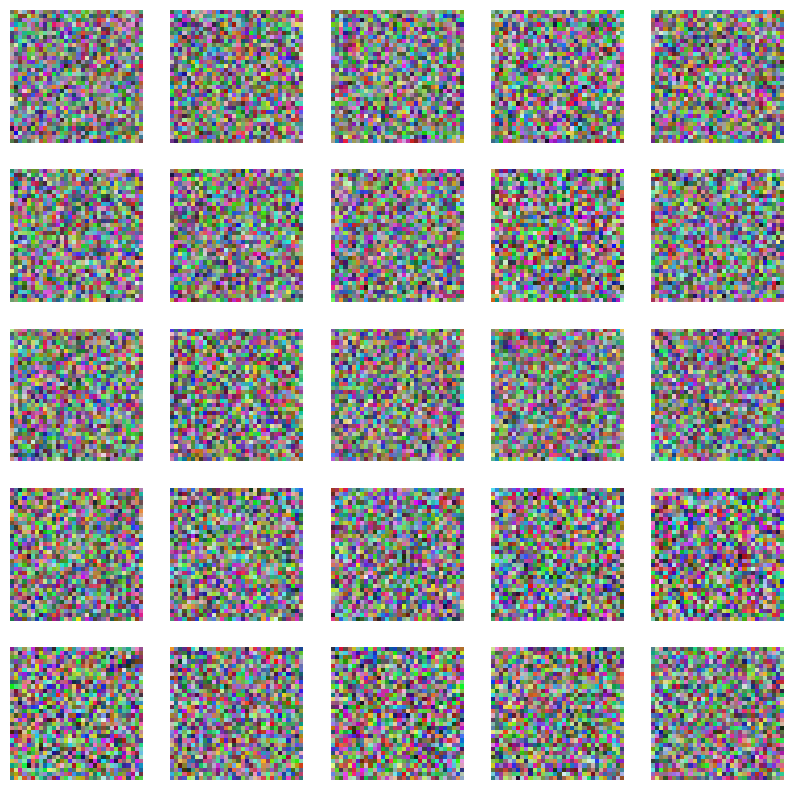

Epoch [42/100]  Loss D: 1.3895, Loss G: 0.6555
Epoch [42/100]  Loss D: 1.3890, Loss G: 0.6587
Epoch [42/100]  Loss D: 1.3868, Loss G: 0.6574
Epoch [42/100]  Loss D: 1.3883, Loss G: 0.6567
Epoch [42/100]  Loss D: 1.3872, Loss G: 0.6595
Epoch [42/100]  Loss D: 1.3904, Loss G: 0.6569
Epoch [42/100]  Loss D: 1.3850, Loss G: 0.6577
Epoch [42/100]  Loss D: 1.3869, Loss G: 0.6582
Epoch [42/100]  Loss D: 1.3869, Loss G: 0.6574
Epoch [42/100]  Loss D: 1.3866, Loss G: 0.6568
Epoch [42/100]  Loss D: 1.3887, Loss G: 0.6575
Epoch [42/100]  Loss D: 1.3873, Loss G: 0.6574
Epoch [42/100]  Loss D: 1.3850, Loss G: 0.6594
Epoch [42/100]  Loss D: 1.3894, Loss G: 0.6583
Epoch [42/100]  Loss D: 1.3861, Loss G: 0.6579
Epoch [42/100]  Loss D: 1.3830, Loss G: 0.6575
Epoch [42/100]  Loss D: 1.3913, Loss G: 0.6586
Epoch [42/100]  Loss D: 1.3884, Loss G: 0.6559
Epoch [42/100]  Loss D: 1.3869, Loss G: 0.6555
Epoch [42/100]  Loss D: 1.3908, Loss G: 0.6565
Epoch [42/100]  Loss D: 1.3856, Loss G: 0.6563
Epoch [42/100

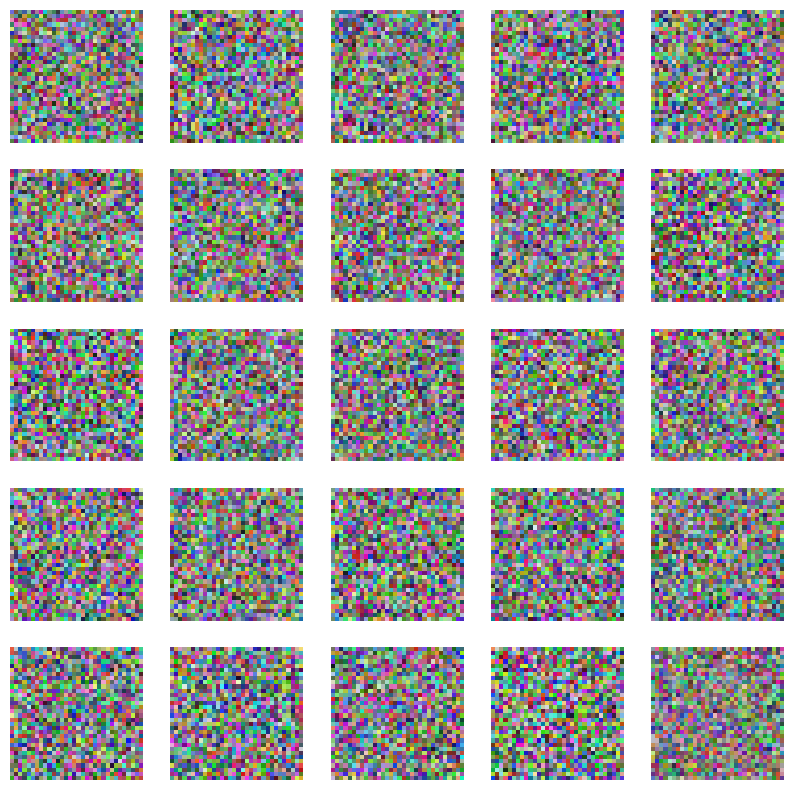

Epoch [52/100]  Loss D: 1.3880, Loss G: 0.6573
Epoch [52/100]  Loss D: 1.3831, Loss G: 0.6590
Epoch [52/100]  Loss D: 1.3892, Loss G: 0.6575
Epoch [52/100]  Loss D: 1.3884, Loss G: 0.6560
Epoch [52/100]  Loss D: 1.3873, Loss G: 0.6574
Epoch [52/100]  Loss D: 1.3873, Loss G: 0.6569
Epoch [52/100]  Loss D: 1.3855, Loss G: 0.6585
Epoch [52/100]  Loss D: 1.3889, Loss G: 0.6583
Epoch [52/100]  Loss D: 1.3862, Loss G: 0.6570
Epoch [52/100]  Loss D: 1.3893, Loss G: 0.6568
Epoch [52/100]  Loss D: 1.3869, Loss G: 0.6585
Epoch [52/100]  Loss D: 1.3875, Loss G: 0.6586
Epoch [52/100]  Loss D: 1.3889, Loss G: 0.6556
Epoch [52/100]  Loss D: 1.3861, Loss G: 0.6595
Epoch [52/100]  Loss D: 1.3891, Loss G: 0.6570
Epoch [52/100]  Loss D: 1.3876, Loss G: 0.6560
Epoch [52/100]  Loss D: 1.3879, Loss G: 0.6576
Epoch [52/100]  Loss D: 1.3887, Loss G: 0.6565
Epoch [52/100]  Loss D: 1.3855, Loss G: 0.6594
Epoch [52/100]  Loss D: 1.3898, Loss G: 0.6570
Epoch [52/100]  Loss D: 1.3882, Loss G: 0.6593
Epoch [52/100

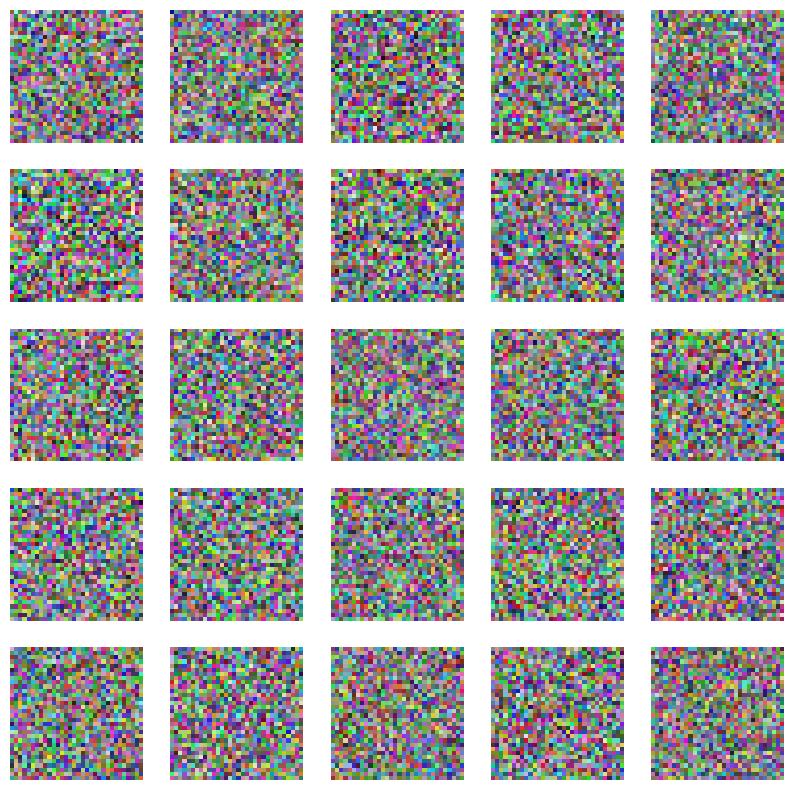

Epoch [62/100]  Loss D: 1.3894, Loss G: 0.6574
Epoch [62/100]  Loss D: 1.3882, Loss G: 0.6564
Epoch [62/100]  Loss D: 1.3888, Loss G: 0.6568
Epoch [62/100]  Loss D: 1.3886, Loss G: 0.6588
Epoch [62/100]  Loss D: 1.3859, Loss G: 0.6582
Epoch [62/100]  Loss D: 1.3866, Loss G: 0.6572
Epoch [62/100]  Loss D: 1.3859, Loss G: 0.6589
Epoch [62/100]  Loss D: 1.3862, Loss G: 0.6574
Epoch [62/100]  Loss D: 1.3869, Loss G: 0.6580
Epoch [62/100]  Loss D: 1.3846, Loss G: 0.6578
Epoch [62/100]  Loss D: 1.3862, Loss G: 0.6590
Epoch [62/100]  Loss D: 1.3848, Loss G: 0.6596
Epoch [62/100]  Loss D: 1.3900, Loss G: 0.6579
Epoch [62/100]  Loss D: 1.3865, Loss G: 0.6572
Epoch [62/100]  Loss D: 1.3880, Loss G: 0.6578
Epoch [62/100]  Loss D: 1.3865, Loss G: 0.6583
Epoch [62/100]  Loss D: 1.3880, Loss G: 0.6585
Epoch [62/100]  Loss D: 1.3852, Loss G: 0.6589
Epoch [62/100]  Loss D: 1.3893, Loss G: 0.6577
Epoch [62/100]  Loss D: 1.3877, Loss G: 0.6561
Epoch [62/100]  Loss D: 1.3883, Loss G: 0.6584
Epoch [62/100

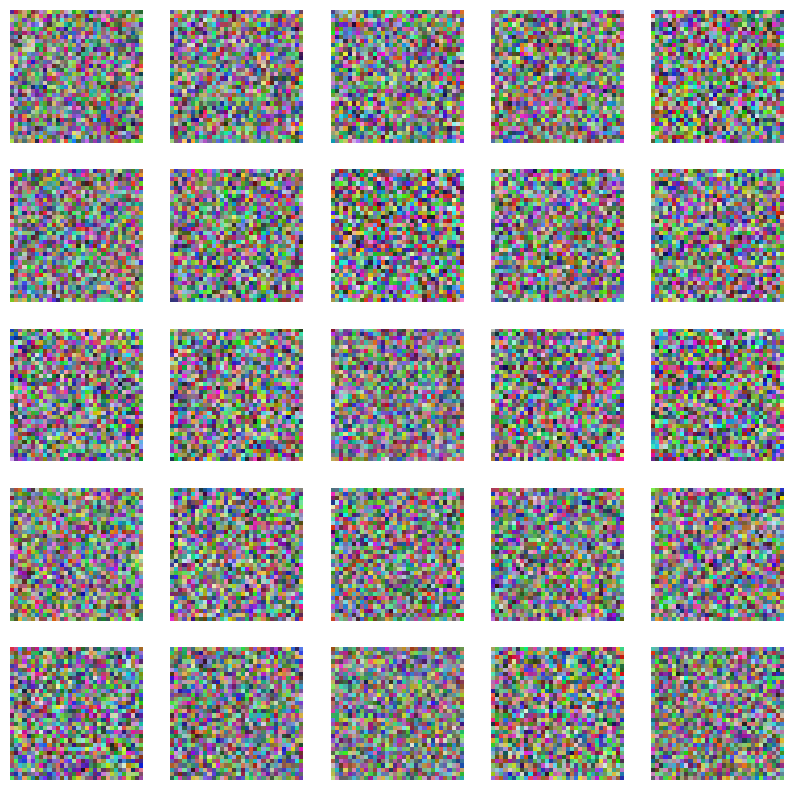

Epoch [72/100]  Loss D: 1.3903, Loss G: 0.6578
Epoch [72/100]  Loss D: 1.3890, Loss G: 0.6578
Epoch [72/100]  Loss D: 1.3889, Loss G: 0.6584
Epoch [72/100]  Loss D: 1.3876, Loss G: 0.6589
Epoch [72/100]  Loss D: 1.3883, Loss G: 0.6570
Epoch [72/100]  Loss D: 1.3867, Loss G: 0.6575
Epoch [72/100]  Loss D: 1.3898, Loss G: 0.6571
Epoch [72/100]  Loss D: 1.3849, Loss G: 0.6565
Epoch [72/100]  Loss D: 1.3867, Loss G: 0.6574
Epoch [72/100]  Loss D: 1.3858, Loss G: 0.6575
Epoch [72/100]  Loss D: 1.3847, Loss G: 0.6574
Epoch [72/100]  Loss D: 1.3872, Loss G: 0.6565
Epoch [72/100]  Loss D: 1.3872, Loss G: 0.6573
Epoch [72/100]  Loss D: 1.3866, Loss G: 0.6579
Epoch [72/100]  Loss D: 1.3864, Loss G: 0.6570
Epoch [72/100]  Loss D: 1.3909, Loss G: 0.6576
Epoch [72/100]  Loss D: 1.3850, Loss G: 0.6580
Epoch [72/100]  Loss D: 1.3878, Loss G: 0.6581
Epoch [72/100]  Loss D: 1.3861, Loss G: 0.6565
Epoch [72/100]  Loss D: 1.3887, Loss G: 0.6571
Epoch [72/100]  Loss D: 1.3876, Loss G: 0.6578
Epoch [72/100

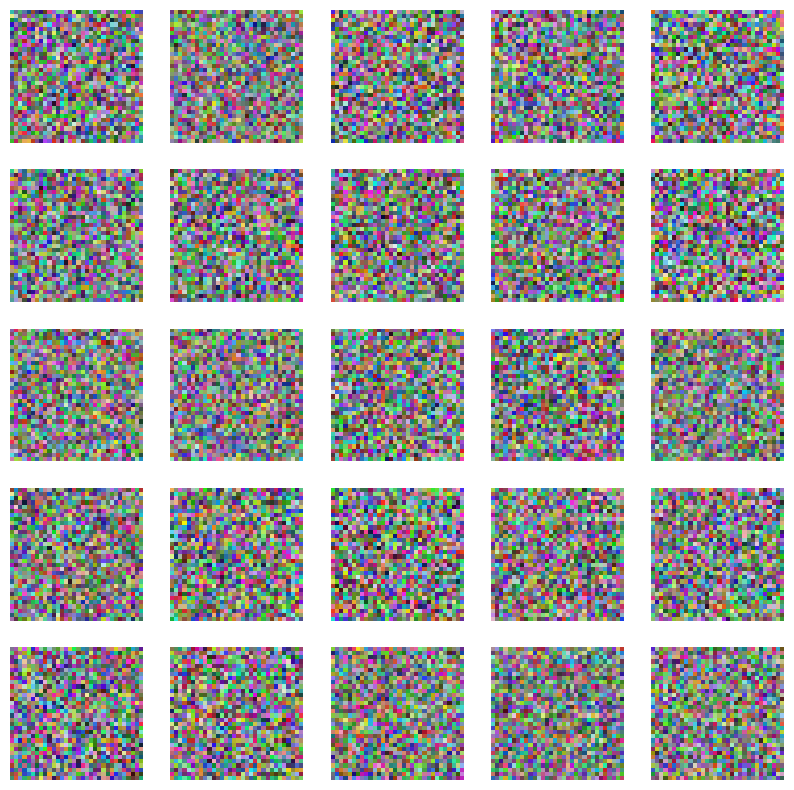

Epoch [82/100]  Loss D: 1.3875, Loss G: 0.6589
Epoch [82/100]  Loss D: 1.3856, Loss G: 0.6583
Epoch [82/100]  Loss D: 1.3889, Loss G: 0.6570
Epoch [82/100]  Loss D: 1.3854, Loss G: 0.6574
Epoch [82/100]  Loss D: 1.3851, Loss G: 0.6572
Epoch [82/100]  Loss D: 1.3867, Loss G: 0.6567
Epoch [82/100]  Loss D: 1.3866, Loss G: 0.6591
Epoch [82/100]  Loss D: 1.3867, Loss G: 0.6564
Epoch [82/100]  Loss D: 1.3900, Loss G: 0.6565
Epoch [82/100]  Loss D: 1.3880, Loss G: 0.6567
Epoch [82/100]  Loss D: 1.3873, Loss G: 0.6564
Epoch [82/100]  Loss D: 1.3883, Loss G: 0.6591
Epoch [82/100]  Loss D: 1.3837, Loss G: 0.6582
Epoch [82/100]  Loss D: 1.3853, Loss G: 0.6577
Epoch [82/100]  Loss D: 1.3871, Loss G: 0.6583
Epoch [82/100]  Loss D: 1.3845, Loss G: 0.6574
Epoch [82/100]  Loss D: 1.3864, Loss G: 0.6580
Epoch [82/100]  Loss D: 1.3883, Loss G: 0.6597
Epoch [82/100]  Loss D: 1.3914, Loss G: 0.6571
Epoch [82/100]  Loss D: 1.3865, Loss G: 0.6576
Epoch [82/100]  Loss D: 1.3871, Loss G: 0.6578
Epoch [82/100

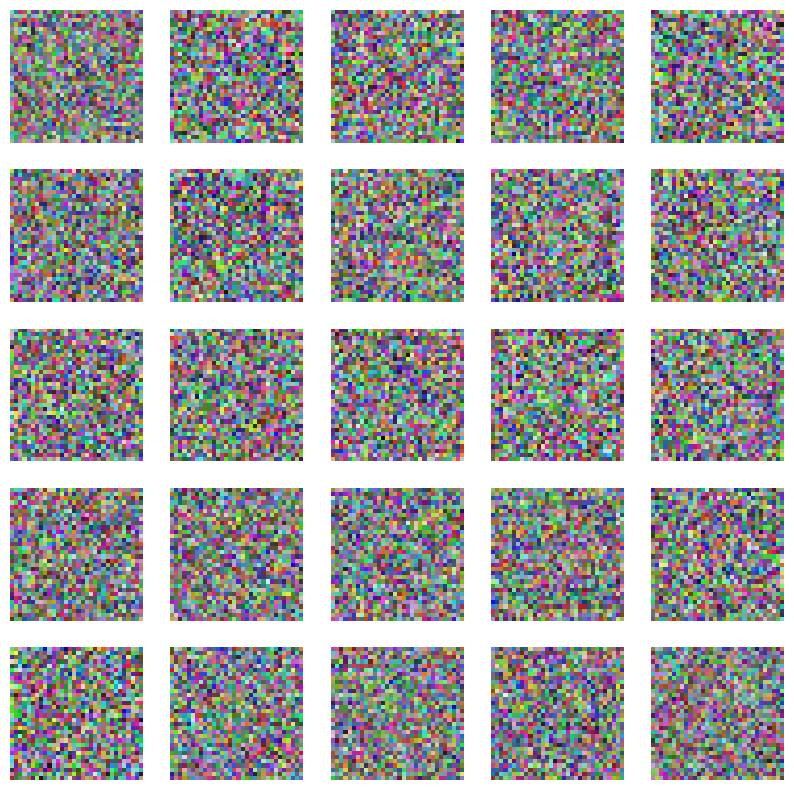

Epoch [92/100]  Loss D: 1.3882, Loss G: 0.6576
Epoch [92/100]  Loss D: 1.3876, Loss G: 0.6571
Epoch [92/100]  Loss D: 1.3865, Loss G: 0.6560
Epoch [92/100]  Loss D: 1.3914, Loss G: 0.6560
Epoch [92/100]  Loss D: 1.3879, Loss G: 0.6583
Epoch [92/100]  Loss D: 1.3834, Loss G: 0.6572
Epoch [92/100]  Loss D: 1.3865, Loss G: 0.6574
Epoch [92/100]  Loss D: 1.3885, Loss G: 0.6568
Epoch [92/100]  Loss D: 1.3868, Loss G: 0.6576
Epoch [92/100]  Loss D: 1.3856, Loss G: 0.6576
Epoch [92/100]  Loss D: 1.3866, Loss G: 0.6574
Epoch [92/100]  Loss D: 1.3909, Loss G: 0.6582
Epoch [92/100]  Loss D: 1.3882, Loss G: 0.6575
Epoch [92/100]  Loss D: 1.3889, Loss G: 0.6582
Epoch [92/100]  Loss D: 1.3835, Loss G: 0.6571
Epoch [92/100]  Loss D: 1.3855, Loss G: 0.6568
Epoch [92/100]  Loss D: 1.3875, Loss G: 0.6592
Epoch [92/100]  Loss D: 1.3878, Loss G: 0.6565
Epoch [92/100]  Loss D: 1.3834, Loss G: 0.6578
Epoch [92/100]  Loss D: 1.3886, Loss G: 0.6554
Epoch [92/100]  Loss D: 1.3837, Loss G: 0.6579
Epoch [92/100

In [40]:
discriminator = Discriminator().to(device)
generator = Generator().to(device)

for epoch in range(1,numberOfEpochs):
    for i, data in enumerate(dataloader):
        images, _ = data
        realImages = images.to(device)

        realLabels = torch.ones(realImages.size(0)).to(device)
        fakeLabels = torch.zeros(realImages.size(0)).to(device)

        #Train Discriminator
        optimizerDiscriminator.zero_grad()
        outputReal = discriminator(realImages.view(realImages.size(0), -1)).view(-1)
        realLoss = criterion(outputReal, realLabels)
        realLoss.backward()

        noise = torch.randn(realImages.size(0), latentDim, device=device)
        fakeImages = generator(noise)
        outputFake = discriminator(fakeImages.detach().view(fakeImages.size(0), -1)).view(-1)
        fakeLoss = criterion(outputFake, fakeLabels)
        fakeLoss.backward()
        optimizerDiscriminator.step()

        #Train Generator
        optimizerGenerator.zero_grad()
        outputGenerated = discriminator(fakeImages.view(fakeImages.size(0), -1)).view(-1)
        generatorLoss = criterion(outputGenerated, realLabels)
        generatorLoss.backward()
        optimizerGenerator.step()

        print(f"Epoch [{epoch + 1}/{numberOfEpochs}]  Loss D: {realLoss.item() + fakeLoss.item():.4f}, Loss G: {generatorLoss.item():.4f}")

    if epoch % 10 == 0:
        plt.figure(figsize=(10, 10))
        with torch.no_grad():
            z = torch.randn(25, latentDim).to(device)
            fakeImages = generator(z).detach().cpu()
            for j in range(25):
                plt.subplot(5, 5, j + 1)
                plt.imshow((fakeImages[j].permute(1, 2, 0).numpy() * 0.5) + 0.5)
                plt.axis('off')

        plt.savefig(os.path.join(saveDir, f'epoch_{epoch + 1}.png'))
        plt.show()
        plt.close()

print("Training finished.")
